# Distribution Visualization 



This notebook is used for visualizing distribution of PD vs NON-PD accross mPower Version 1 (filtered healthcodes), mPower Version 2, mPower Passive Data, Elevate MS. Features of mean and maximum collapsed PDKIT features will be used.

In [33]:
import sys
import os
import warnings
sys.path.append("../PythonScripts")
warnings.simplefilter("ignore")
import preprocessing_utils as proc
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import synapseclient as sc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
%matplotlib inline

In [70]:
def plot_distribution(dataV1, dataV2, dataPassive):
    for feat in [feat for feat in dataV1.columns if "." in feat]:
        ax_count = 0
        fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
        for data in [dataV1, dataV2, dataPassive]:
            PD = data[data["PD"] == 1][feat].dropna()
            NONPD = data[data["PD"] == 0][feat].dropna()
            sns.distplot(PD, label = "PD", kde_kws={"shade": True}, hist = False, ax = axes[ax_count])
            sns.distplot(NONPD, label = "NONPD", kde_kws={"shade": True}, hist = False, ax = axes[ax_count])
            axes[0].set_title("Version 1")
            axes[0].grid()
            axes[1].set_title("Version 2")
            axes[1].grid()
            axes[2].set_title("Passive")
            axes[2].grid()
            ax_count += 1
        plt.show()

In [85]:
## syn login
syn = sc.login()


### retrieve version 1 data ###
entityV1 = syn.get("syn21046180")
dataV1   = pd.read_csv(entityV1["path"], index_col = 0)
dataV1 = proc.preprocess(dataV1, "max", True)
dataV1["version"] = "V1"


### retrieve data from mPower version 2 ###
### side note: some data are prune to match the distribution to those in V1 ###
entityV2 = syn.get("syn21046181")
dataV2   = pd.read_csv(entityV2["path"], index_col = 0)
dataV2 = proc.preprocess(dataV2, "max", True)
dataV2 = dataV2[dataV2["age"] >= dataV1["age"].min()]
dataV2["version"] = "V2"


### retrieve passive data ####
entityPassive = syn.get("syn21046184")
dataPassive   = pd.read_csv(entityPassive["path"], index_col = 0)
dataPassive = proc.preprocess(dataPassive, "max", True)
dataPassive = dataPassive[dataPassive["age"] >= dataV1["age"].min()]
dataPassive["version"] = "Passive"


data = pd.concat([dataV1, dataV2, dataPassive]).reset_index()

Welcome, aryton tediarjo!



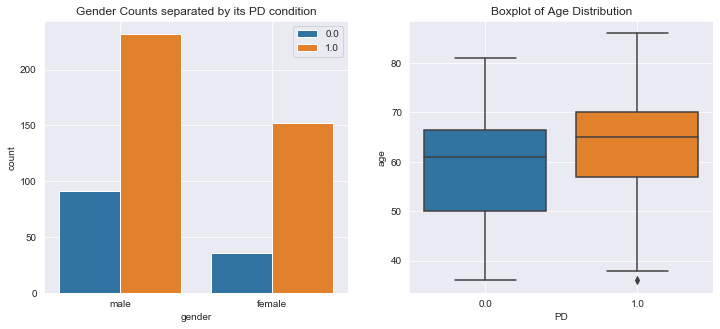

In [119]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)


sns.countplot(data["gender"], hue = data["PD"], ax = axes[0])
axes[0].legend()
axes[0].set_title("Gender Counts separated by its PD condition")
axes[0].grid()
axes[0].figure.set_size_inches(12,5)


sns.boxplot(x = data["PD"], y = data["age"], ax = axes[1])
axes[1].set_title("Boxplot of Age Distribution")
axes[1].figure.set_size_inches(12,5)
axes[1].grid()
plt.show()

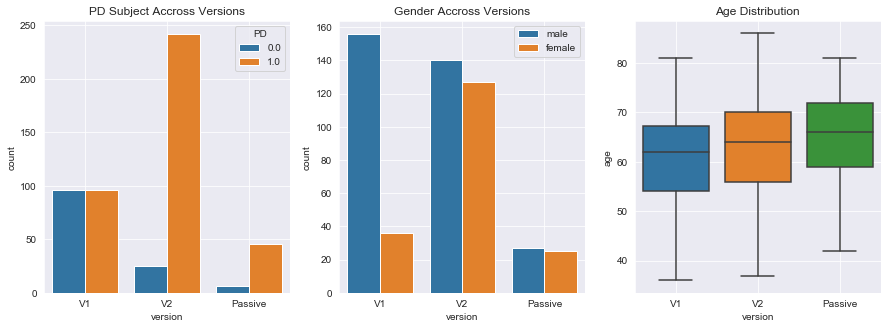

In [117]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)

sns.boxplot(y = data["age"], x = data["version"], ax = axes[2])
axes[2].set_title("Age Distribution")
axes[2].figure.set_size_inches(15,5)
axes[2].grid()

sns.countplot(data["version"], hue = data["gender"], ax = axes[1])
axes[1].legend()
axes[1].set_title("Gender Accross Versions")
axes[1].grid()
axes[1].figure.set_size_inches(15,5)

sns.countplot(data["version"], hue = data["PD"], ax = axes[0])
axes[0].set_title("PD Subject Accross Versions")
axes[0].grid()
axes[0].figure.set_size_inches(15,5)

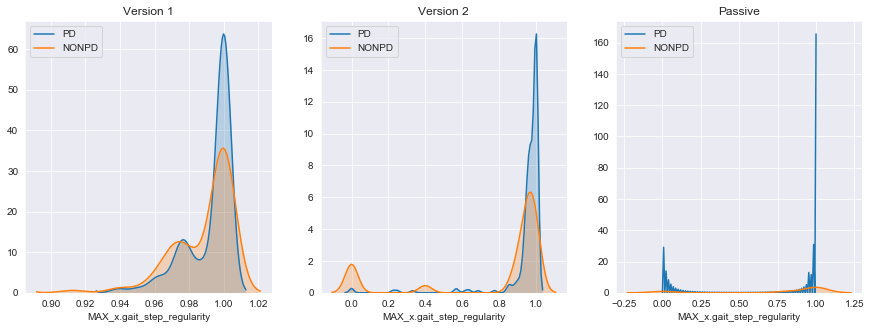

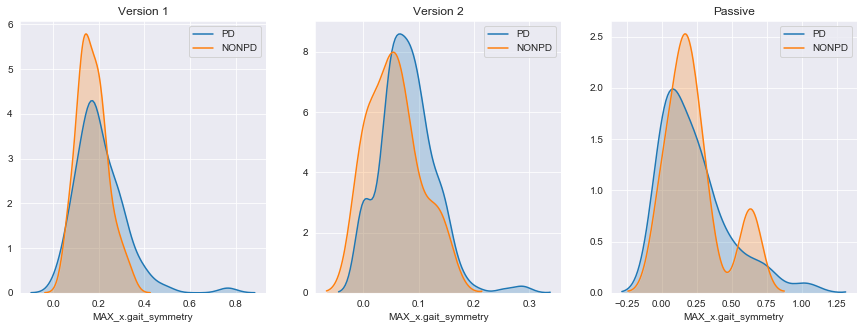

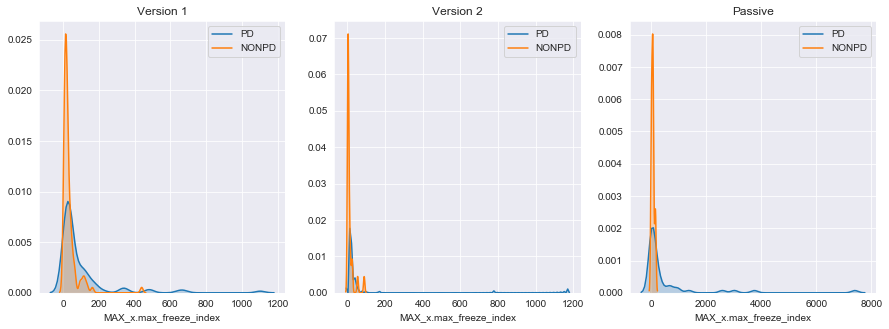

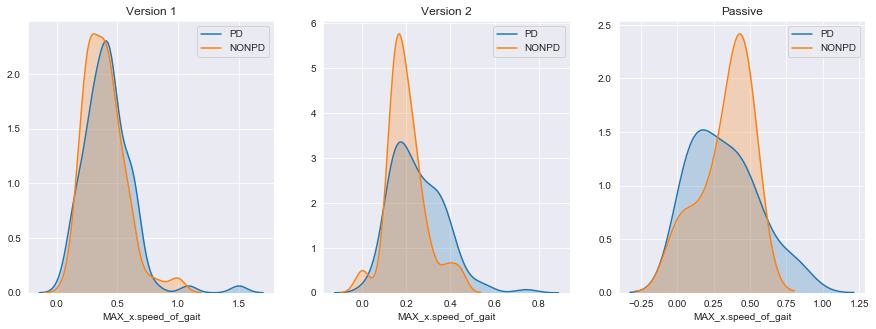

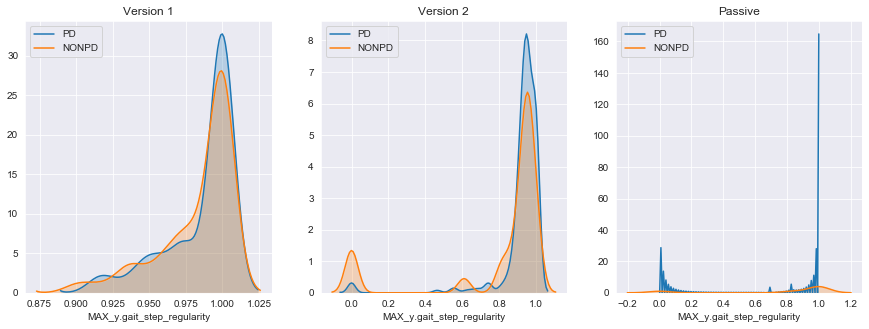

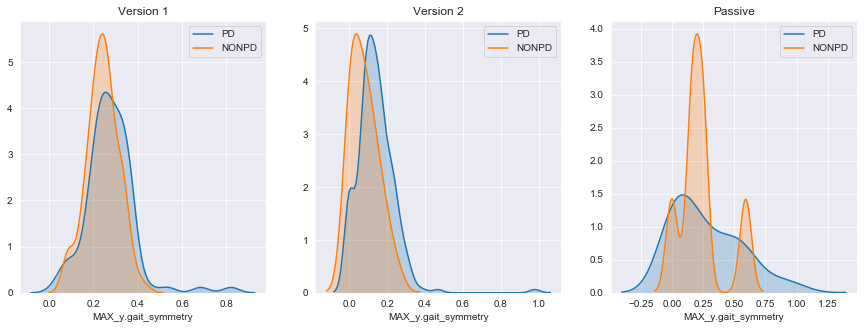

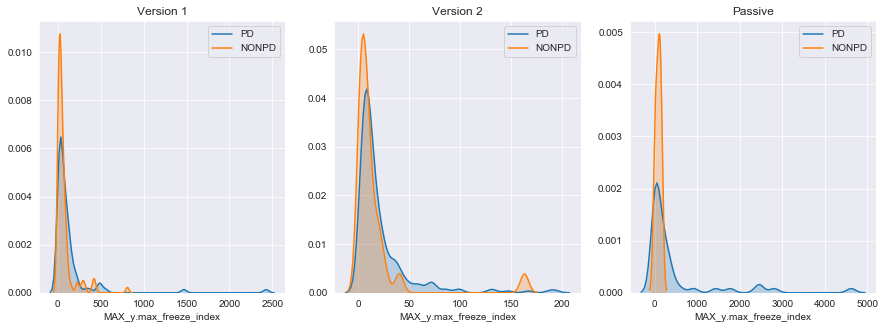

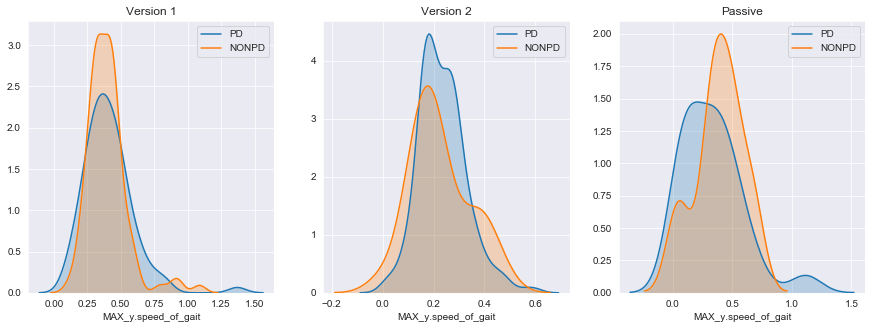

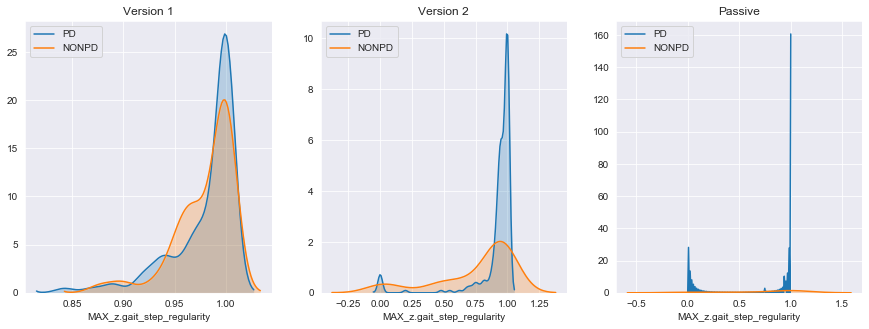

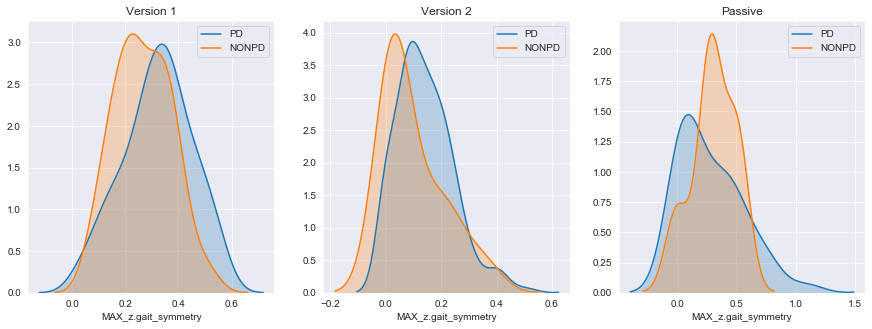

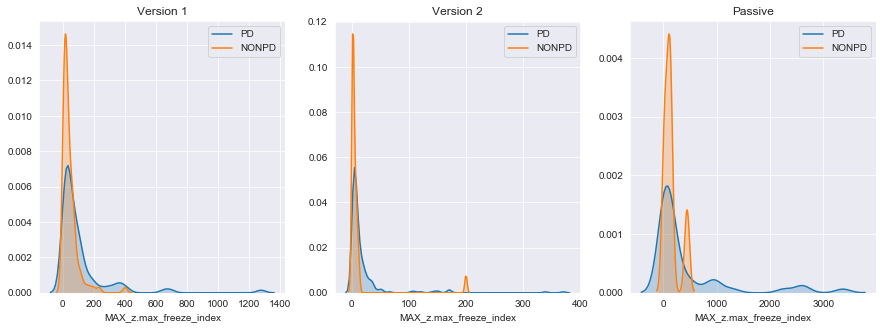

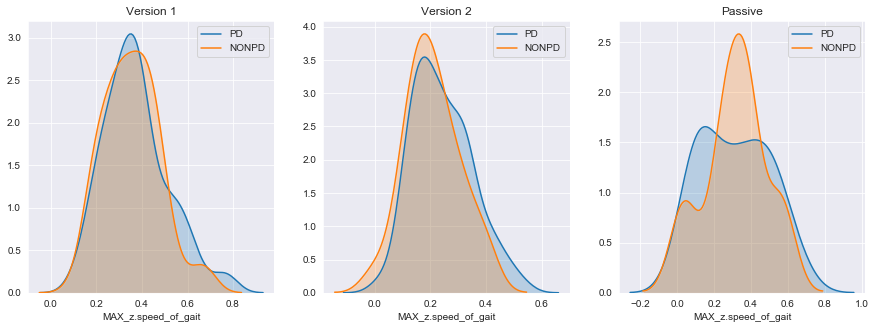

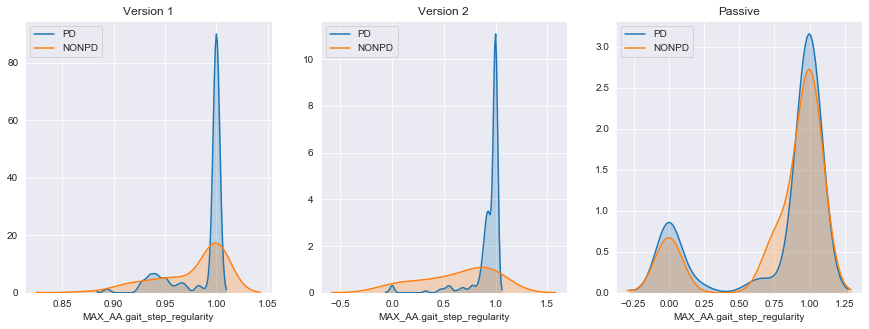

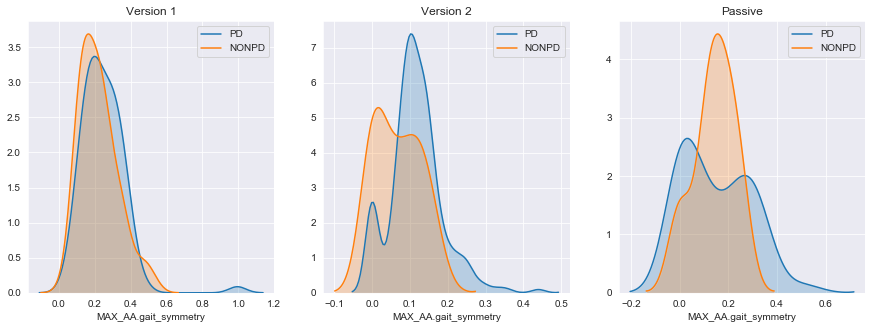

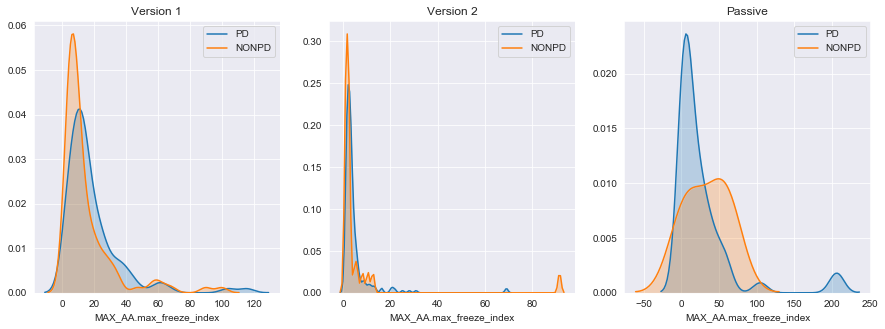

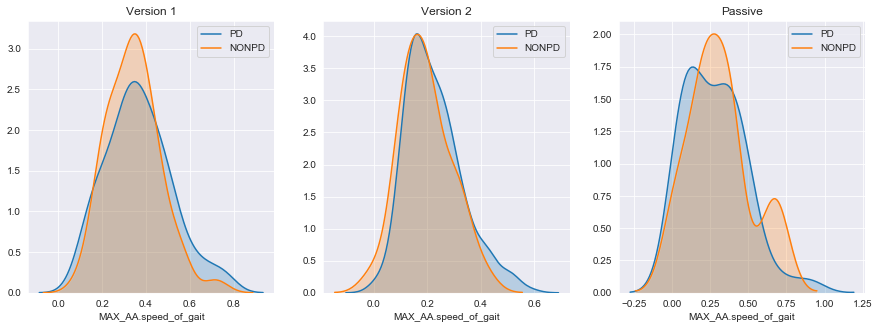

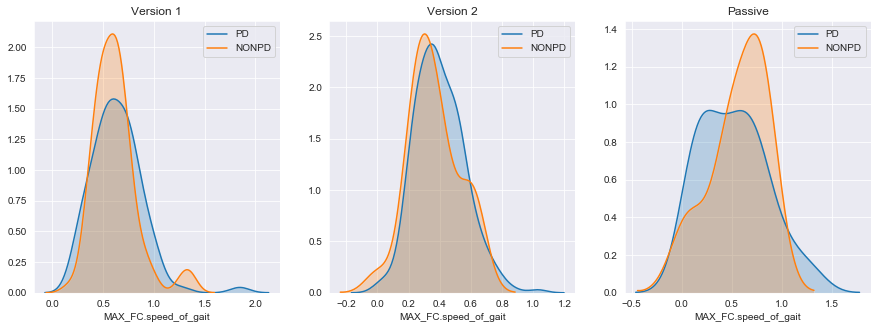

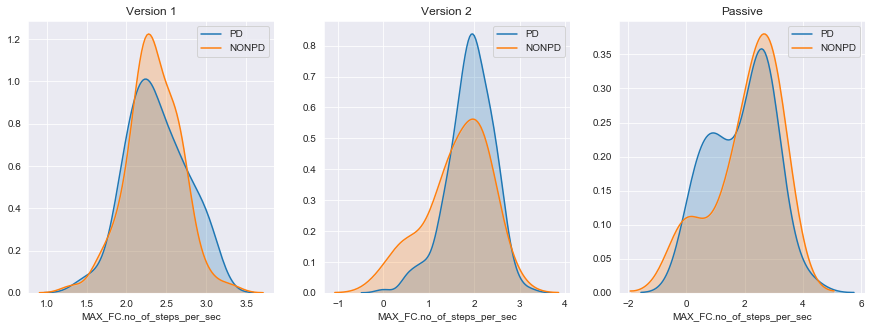

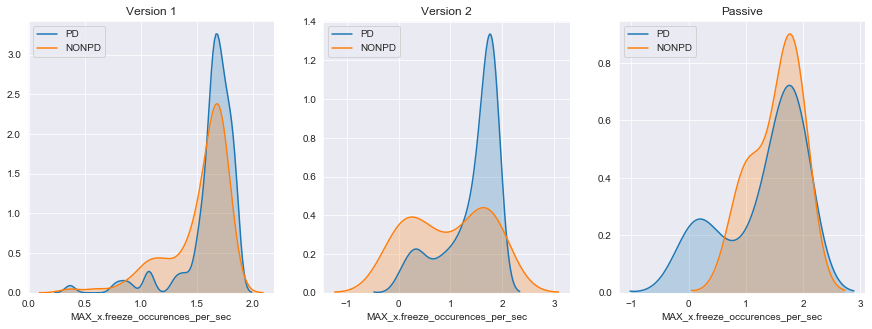

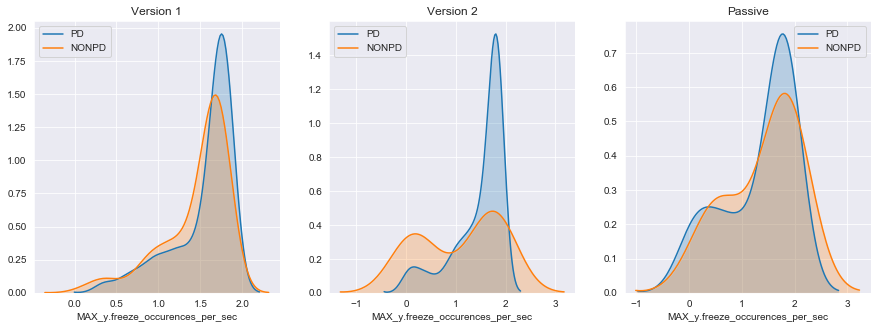

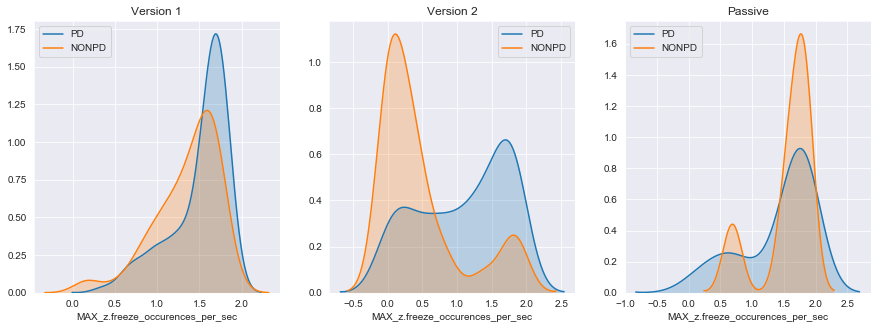

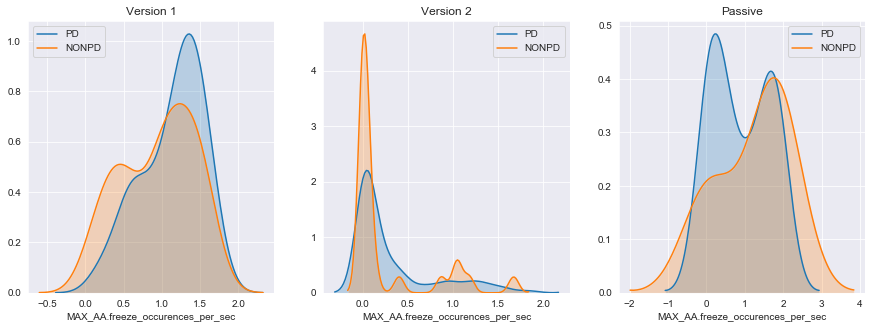

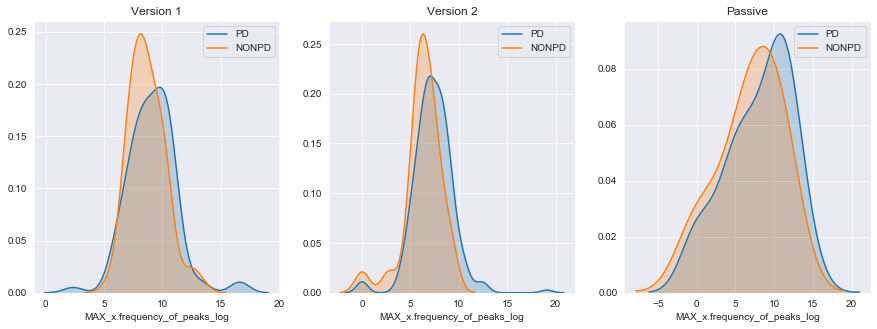

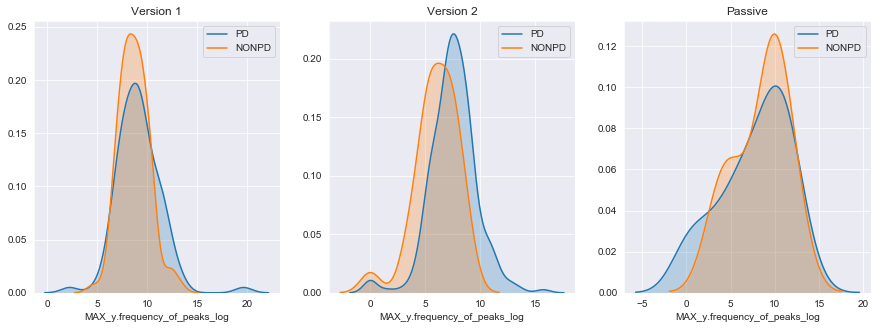

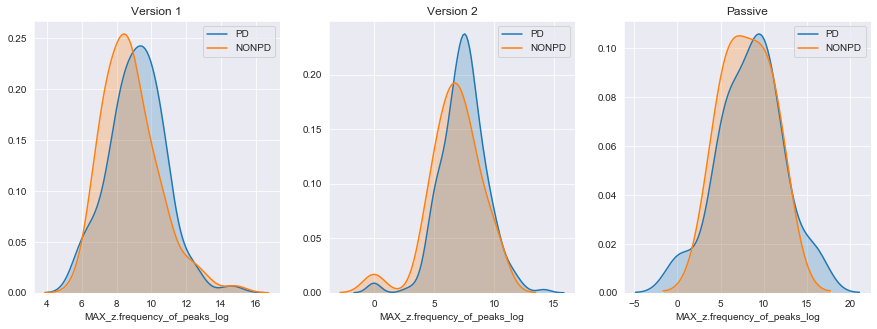

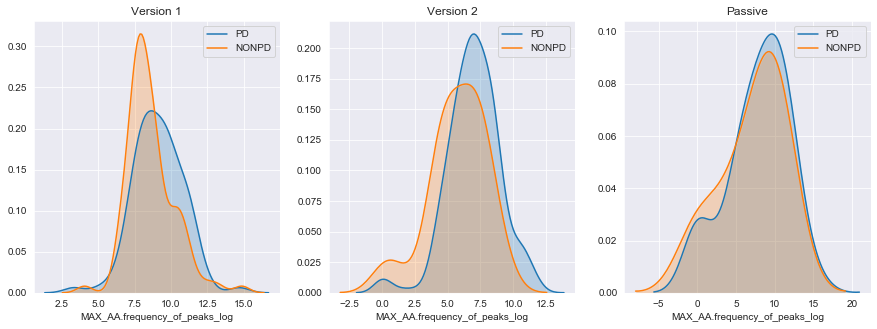

In [73]:
plot_distribution(dataV1, dataV2, dataPassive)